In [1]:
import mmcv
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples
from mmpose.apis import inference_topdown, init_model

import matplotlib.pyplot as plt

In [2]:
img_path = "test.jpg"

In [3]:
model = init_model(
    config="checkpoint/rtmpose-m_8xb32-60e_coco-wholebody-face-256x256.py",
    checkpoint="work_dir/best_NME_epoch_200.pth"
)

Loads checkpoint by local backend from path: work_dir/best_NME_epoch_200.pth


In [4]:
output = inference_topdown(
    model=model,
    img=img_path
)
output = merge_data_samples(output)

In [5]:
model.cfg.visualizer.radius = 10
model.cfg.visualizer.line_width = 5
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.set_dataset_meta(model.dataset_meta)

06/03 10:26:20 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


In [8]:
img = mmcv.imread(img_path)
img = mmcv.imconvert(img, "bgr", "rgb")

img_output = visualizer.add_datasample(
    "result",
    img,
    data_sample=output,
    # draw_gt=False,
    # draw_heatmap=False,
    # draw_bbox=True,
    # show=False,
    # show_kpt_idx=True,
    # wait_time=0,
    # kpt_thr=.3,
)

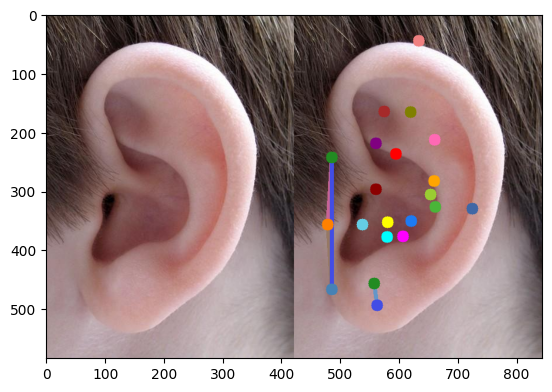

In [9]:
plt.imshow(img_output)